In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Simulating a fair coin

In [10]:
coin = ['tail', 'head']
ten_tosses = np.random.choice(coin, 10)
ten_tosses = np.array([ coin.title() for coin in ten_tosses])
ten_tosses

array(['Tail', 'Head', 'Tail', 'Head', 'Tail', 'Tail', 'Head', 'Tail',
       'Tail', 'Head'], dtype='<U4')

In [13]:
np.count_nonzero(ten_tosses == '0')

0

In [14]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'head')
num_heads

48

In [22]:
def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'head')

In [53]:
num_repetitions = 20_000

heads = []

for i in range(num_repetitions):
    new_value = one_simulated_value()
    heads.append(new_value)

simulation_results = pd.DataFrame(
    data =  {
        'Repetition': np.arange(1, num_repetitions + 1),
        'Number of heads': heads
    }
)
    
simulation_results

,Repetition,Number of heads
0,1,40
1,2,47
2,3,44
3,4,55
4,5,43
...,...,...
19995,19996,49
19996,19997,48
19997,19998,59
19998,19999,48


0    50
Name: Number of heads, dtype: int64

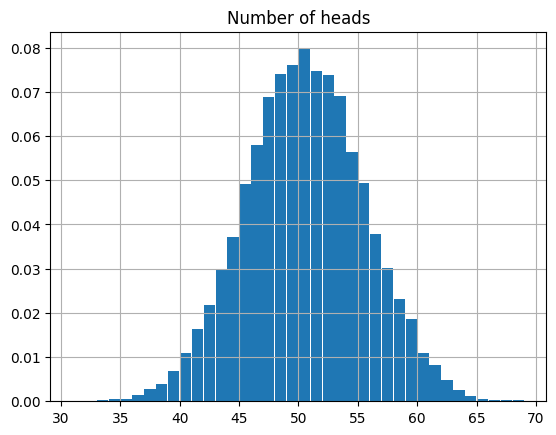

In [76]:
head_results = simulation_results.loc[:,'Number of heads']
minimum = head_results.min()
maximum = head_results.max()

simulation_results.hist(
    'Number of heads',
    rwidth = .95, 
    bins = np.arange(minimum, maximum, 1),
    density = True
)

head_results.mode()

### 9.3.3 Example: Moves in Monopoly

In [77]:
die = np.arange(1, 7)
sum(np.random.choice(die, 2))

3

In [78]:
def one_simulated_move():
    return sum(np.random.choice(die, 2))

In [83]:
num_repetitions = 10_000

moves = []
for _ in range(num_repetitions):
    new_move = one_simulated_move()
    moves.append(new_move)

result = pd.Series(moves)


<AxesSubplot: >

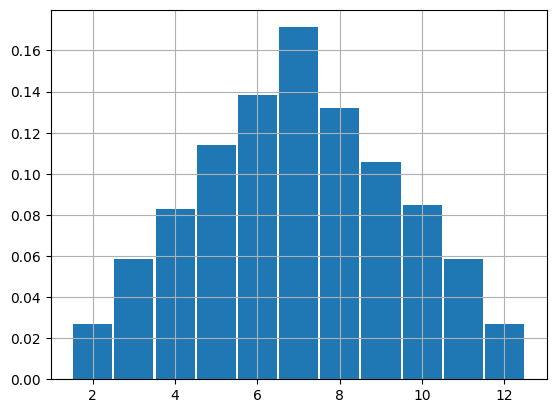

In [89]:
minimum = result.min()
maximum = result.max()

result.hist(
    density=True, 
    bins = np.arange(1.5, 12.6, 1),
    rwidth = .95
)

### 9.4.2 Monty Hall Problem simulation

In [93]:
goats = ['first goat', 'second goat']

def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

In [96]:
hidden_behind_doors = np.append(goats, 'car')



In [165]:
outcome = []

def monty_hall_game():
    contestant_guess = np.random.choice(hidden_behind_doors)
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']

    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]


In [148]:
monty_hall_game().to_frame()

AttributeError: 'NoneType' object has no attribute 'to_frame'

In [201]:
outcome = pd.DataFrame(columns = ['Guess', 'Revealed', 'Remaining'])

for i in range(10):
    outcome.loc[len(outcome)] = monty_hall_game()
    
original_choice = outcome['Guess'].value_counts()


remaining_door = outcome['Remaining'].value_counts()

display(original_choice)
display(remaining_door)



car            4
second goat    3
first goat     3
Name: Guess, dtype: int64

car            6
second goat    3
first goat     1
Name: Remaining, dtype: int64